### Libraries
- MatplotLib (display images)
- Numpy (to make math calculations on image)
- OpenCV2 (to read/write images)
- Time (time the time execution)

### Input Image filepath

In [6]:
# input image filepath
filepath = 'images/input.png'

### Edge Detection Class

In [7]:
import numpy as np

class edge:

    # available filters (some with horizontal(_h) and vertical(_v) direction)
    filters = {
        'diff_h' : np.array(([0, 0, 0],
                                         [0,-1, 1],
                                         [0, 0, 0])),

        'diff_v' : np.array(([0, 0, 0],
                                         [0,-1, 0],
                                         [0, 1, 0])),

        'prewitt_h' : np.array([[-1,0,1],
                                                [-1,0,1],
                                                [-1,0,1]]),

        'prewitt_v' : np.array([[-1,-1,-1],
                                                [0,0,0],
                                                [1,1,1]]),

        'roberts_h' : np.array([[0,0,0],
                                                [0,0,1],
                                                [0,-1,0]]),

        'roberts_v' : np.array([[0,0,0],
                                                [0,1,0],
                                                [0,0,-1]]),

        'sobel_h' : np.array([[-1,0,1],
                                            [-2,0,2],
                                            [-1,0,1]]),

        'sobel_v' : np.array([[-1,-2,-1],
                                            [0,0,0],
                                            [1,2,1]]),

        'laplacian4' : np.array([[0, 1, 0],
                                                [1,-4, 1],
                                                [0,  1, 0]]),

        'laplacian8' : np.array([[1, 1, 1],
                                                [1,-8, 1],
                                                [1, 1, 1]]),
    }

    def detection(img, filtername):

        # get Horizontal/Vertical mask of filter or Laplacian
        mask1 = edge.filters[filtername] if(filtername.startswith('laplacian')) else edge.filters[filtername + '_h']
        mask2 = np.zeros((3,3)) if(filtername.startswith('laplacian')) else edge.filters[filtername + '_v']

        M,N = img.shape[:2] # image size
        imgf = np.zeros((M,N), dtype=np.uint8) # output image

        for x in range(0,M):
            x0,xf = max(x-1,0), min(x+1,M-1) # start and end column indexes
            u0, uf = 0 if (x>0) else 1, 2 if(x<M-1) else 1 # mask start and end column indexes
            
            for y in range(0,N):
                y0,yf = max(y-1,0), min(y+1,N-1) # start and end row indexes
                v0,vf = 0 if(y>0) else 1, 2 if(y<N-1) else 1 # mask start and end row indexes

                # multiply mask to image
                tmp1 = np.multiply(img[x0:xf+1, y0:yf+1],  mask1[u0:uf+1,v0:vf+1])
                tmp2 = np.multiply(img[x0:xf+1, y0:yf+1],  mask2[u0:uf+1,v0:vf+1])

                # sum of all values
                g1 = np.sum(tmp1)
                g2 = np.sum(tmp2)

                # square root (g1^2 + g2^2)
                g = int(np.sqrt(g1*g1+g2*g2))

                # set value g in output image g E [0,255]
                imgf[x,y] = max(min(g, 255), 0)

        return imgf

### Test: Detect edge of input image using each filter

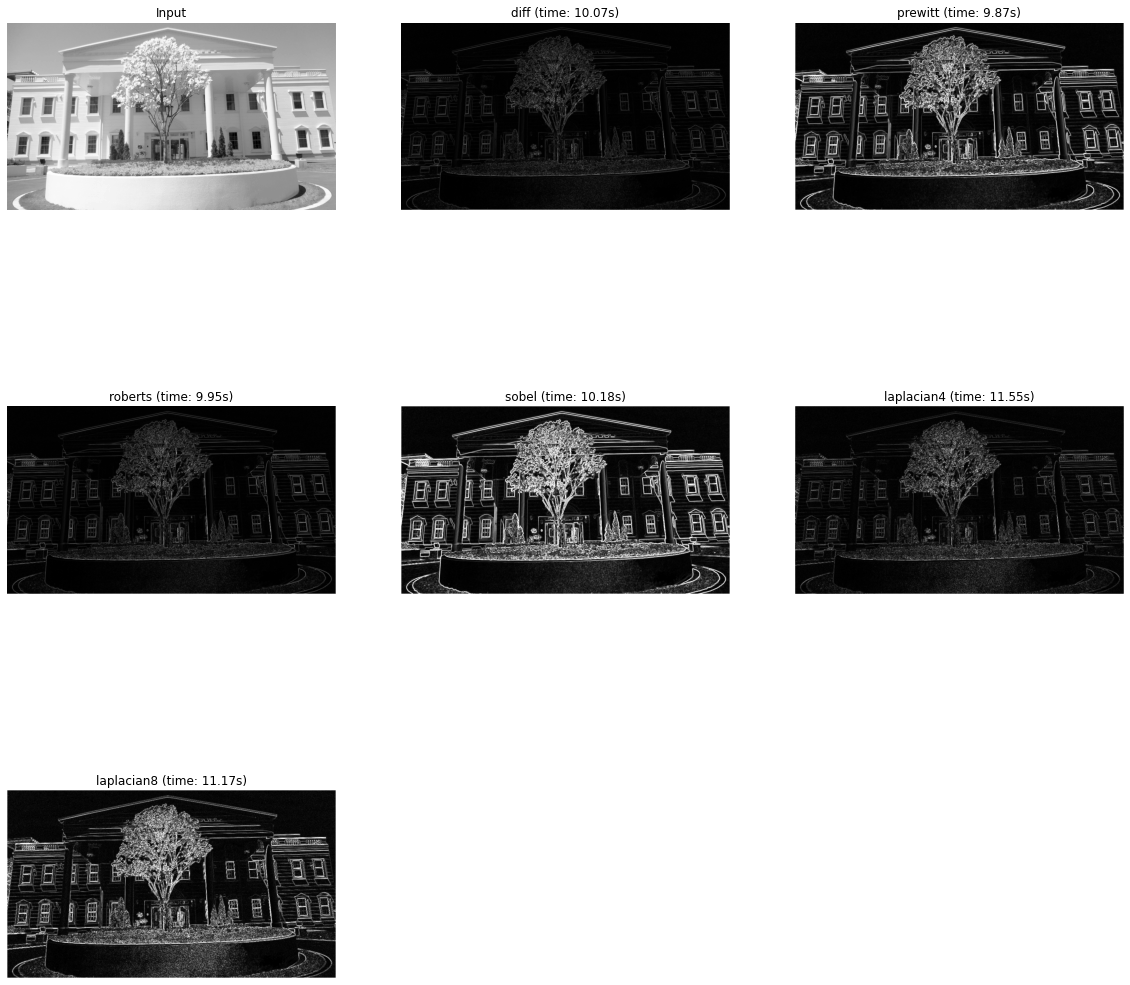

In [8]:
import matplotlib.pyplot as plt
import time
import cv2

# display multiple images on a grid
def displayImages(imgs, titles, m, n):
    size = len(imgs)

    fig = plt.figure(figsize=(20, 20))
    for i in range(size):
        a = fig.add_subplot(m,n, i+1)
        plt.imshow(imgs[i], cmap='gray')
        a.set_title(titles[i])
        plt.axis('off')
    plt.show()
    
# read input image as grayscale
img = cv2.imread(filepath, 0)

imgs = [img]
titles = ['Input']

filters = ['diff', 'prewitt', 'roberts', 'sobel', 'laplacian4', 'laplacian8']
for flt in filters:
    t0 = time.time() # start time
    img1 = edge.detection(img, flt) # calculate edges
    t1 = time.time() # end time
    
    imgs.append(img1)
    titles.append(flt + ' (time: {:.2f}s)'.format(t1-t0))
    
    # save output image for current filter
    #cv2.imwrite('images/output-' + flt+'.png', img3)
    
# display images
displayImages(imgs, titles,3,3)